In [1]:
#Importing the main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

/Users/priyambasu/Library/Python/3.7/lib/python/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/priyambasu/Library/Python/3.7/lib/python/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/priyambasu/Library/Python/3.7/lib/python/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/priyambasu/Library/Python/3.7/lib/python/s

In [2]:
#loading the dataset, from the json file stored in the given directory below, and visualising it
data=pd.read_csv("/Users/priyambasu/Desktop/CODE/ieee_comp/data/final_dataset.csv")
data.head(20)

,Unnamed: 0,ID,tweet_id,text,missing_text,Text_Only_Informative,Image_Only_Informative,Directed_Hate,Generalized_Hate,Sarcasm,Allegation,Justification,Refutation,Support,Oppose
0,0,0,1.052240e+18,New post (Domestic Violence Awareness Hasn't C...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,1.052210e+18,Domestic Violence Awareness Hasn’t Caught Up W...,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,2,1.052180e+18,Mother Nature’s #MeToo https://t.co/nN3hbEHz85\n,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,1.052160e+18,ption - no:2\n,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,4,1.052100e+18,It is 'high time' #MeToo named and shamed men ...,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,5,5,1.052050e+18,“There's this idea that persistence involves s...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,6,6,1.052010e+18,ption - no:2\n,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7,7,7,1.051990e+18,Meredith’s #MeToo moment on #TheOffice https:/...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,8,1.051980e+18,Interesting analysis by @TheEconomist about th...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,9,9,1.051940e+18,"What a shock hey, Old Bill is in the clear &am...",0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


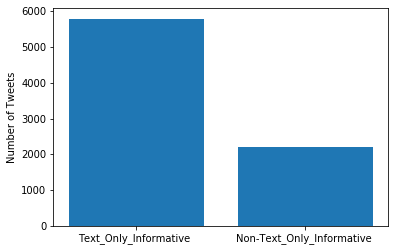

In [6]:
#Visualization
sarcastic=0
for i in range(len(data["Text_Only_Informative"])):
    if data["Text_Only_Informative"].iloc[i]==1:
        sarcastic+=1
normal=len(data["Text_Only_Informative"])-sarcastic
label_values={"Text_Only_Informative " : sarcastic, "Non-Text_Only_Informative " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

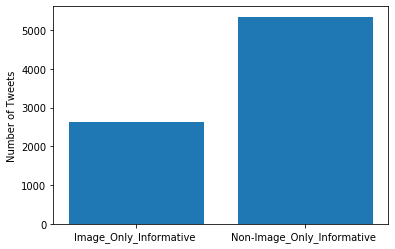

In [7]:
#Visualization
sarcastic=0
for i in range(len(data["Image_Only_Informative"])):
    if data["Image_Only_Informative"].iloc[i]==1:
        sarcastic+=1
normal=len(data["Image_Only_Informative"])-sarcastic
label_values={"Image_Only_Informative " : sarcastic, "Non-Image_Only_Informative " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

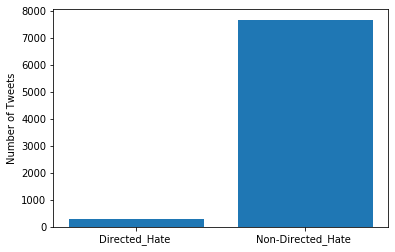

In [8]:
#Visualization
sarcastic=0
for i in range(len(data["Directed_Hate"])):
    if data["Directed_Hate"].iloc[i]==1:
        sarcastic+=1
normal=len(data["Directed_Hate"])-sarcastic
label_values={"Directed_Hate " : sarcastic, "Non-Directed_Hate " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

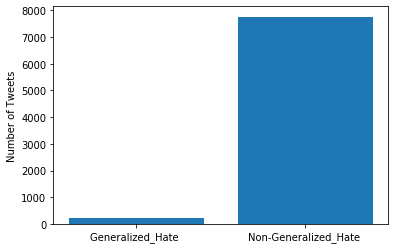

In [9]:
#Visualization
sarcastic=0
for i in range(len(data["Generalized_Hate"])):
    if data["Generalized_Hate"].iloc[i]==1:
        sarcastic+=1
normal=len(data["Generalized_Hate"])-sarcastic
label_values={"Generalized_Hate " : sarcastic, "Non-Generalized_Hate " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

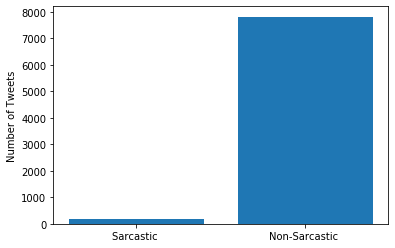

In [10]:
#Visualization
sarcastic=0
for i in range(len(data["Sarcasm"])):
    if data["Sarcasm"].iloc[i]==1:
        sarcastic+=1
normal=len(data["Sarcasm"])-sarcastic
label_values={"Sarcastic " : sarcastic, "Non-Sarcastic " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

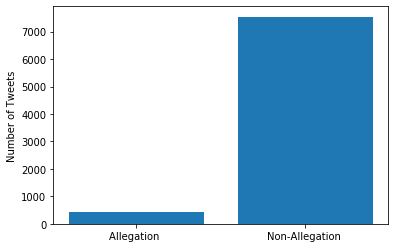

In [13]:
#Visualization
sarcastic=0
for i in range(len(data["Allegation"])):
    if data["Allegation"].iloc[i]==1:
        sarcastic+=1
normal=len(data["Allegation"])-sarcastic
label_values={"Allegation " : sarcastic, "Non-Allegation " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

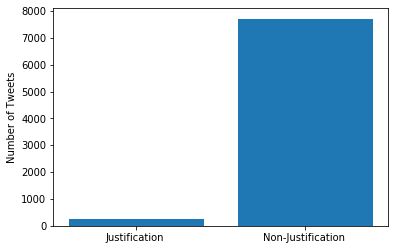

In [14]:
#Visualization
sarcastic=0
for i in range(len(data["Justification"])):
    if data["Justification"].iloc[i]==1:
        sarcastic+=1
normal=len(data["Justification"])-sarcastic
label_values={"Justification " : sarcastic, "Non-Justification " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

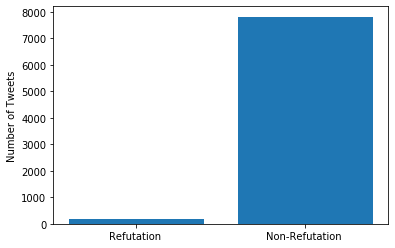

In [15]:
#Visualization
sarcastic=0
for i in range(len(data["Refutation"])):
    if data["Refutation"].iloc[i]==1:
        sarcastic+=1
normal=len(data["Refutation"])-sarcastic
label_values={"Refutation " : sarcastic, "Non-Refutation " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

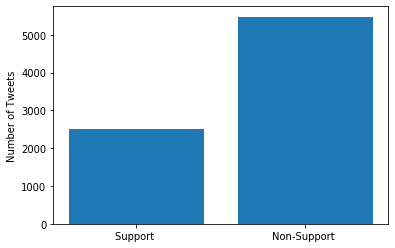

In [16]:
#Visualization
sarcastic=0
for i in range(len(data["Support"])):
    if data["Support"].iloc[i]==1:
        sarcastic+=1
normal=len(data["Support"])-sarcastic
label_values={"Support " : sarcastic, "Non-Support " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

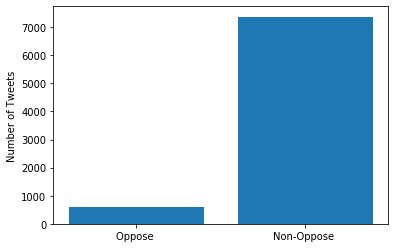

In [17]:
#Visualization
sarcastic=0
for i in range(len(data["Oppose"])):
    if data["Oppose"].iloc[i]==1:
        sarcastic+=1
normal=len(data["Oppose"])-sarcastic
label_values={"Oppose " : sarcastic, "Non-Oppose " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()